In [12]:
import seaborn as sns
import gym
import numpy as np


In [2]:
env = gym.make('Blackjack-v0')

In [3]:
print(env.__doc__)

Simple blackjack environment

    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with each (player and dealer) having one face up and one
    face down card.

    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).

    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.

    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.

    The observation of a 3-tuple of: the players c

In [4]:
## The code below shows how to implement GLIE.
import numpy as np
import gym

def epsilon_greedy_policy(Q, epsilon, actions):
    """ Q is a numpy array, epsilon between 0,1 
    and a list of actions"""
    
    def policy_fn(state):
        if np.random.rand()>epsilon:
            action = np.argmax([Q[state][a] for a in actions])
        else:
            action = np.random.choice(actions)
        return action
    return policy_fn



def run_episode(env, policy): 
    done = False
    state = env.reset()
    episode = []
    while not done:
        action = policy(state)
        new_state, reward, done, _ = env.step(action)
        episode.append((state,action,reward))
        state = new_state    
    return episode

In [6]:
from collections import defaultdict
from tqdm import tqdm
n_iter = 50000

gamma = 0.9

Q = defaultdict(lambda: np.zeros(env.action_space.n))
R = defaultdict(lambda: np.zeros(env.action_space.n))
N = defaultdict(lambda: np.zeros(env.action_space.n))

for j in tqdm(range(n_iter)):
    policy = epsilon_greedy_policy(Q, 0.9**j, range(env.action_space.n))
    episode = run_episode(env,policy)
    ep_reward = sum(x[2]*(gamma**i) for i, x in enumerate(episode))
    
    sa_in_episode = set([(tuple(x[0]),x[1]) for x in episode]) # each state is converted to a tuple to use as dict key
    
    # Find first visit of each s,a in the episode
    for s,a in sa_in_episode:
        first_visit = next(i for i,x in enumerate(episode) \
                           if x[0]==s and x[1]==a)
        G = sum(x[2]*(gamma**i) for i, x in enumerate(episode[first_visit:]))
        R[s][a]+= G
        N[s][a] +=1
        Q[s][a] += R[s][a]/N[s][a]

100%|███████████████████████████████| 50000/50000 [00:04<00:00, 11148.67it/s]


In [7]:
import matplotlib.pyplot as plt
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value

In [8]:
keys = sorted(V.keys())
score = [k[0] for k in keys]
dealer_score = [k[1] for k in keys]
usable = [k[2] for k in keys]
vals = [V[k] for k in keys] 

In [9]:
import pandas as pd
df = pd.DataFrame({'score':score,'dealer_score':dealer_score,'usable':usable, 'val':vals})

Text(0.5,1,'Usable ace')

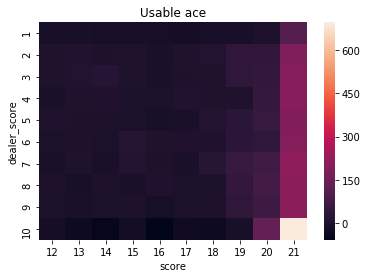

In [13]:
ax = plt.axes()
sns.heatmap(df[df['usable']==True].pivot('dealer_score','score','val'), ax = ax)
ax.set_title("Usable ace")

Text(0.5,1,'Non-usable ace')

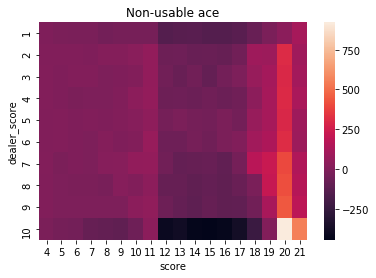

In [14]:
ax = plt.axes()
sns.heatmap(df[df['usable']==False].pivot('dealer_score','score','val'), ax = ax)
ax.set_title("Non-usable ace")

## Your turn:

- Can you modify the code above to implement first-visit Montecarlo with GLIE ("Greedy in the limit with infinite exploration")?
- Plot the value function